In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [12]:
# Load data
df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')[['Close']].copy()
df.columns = ['price']
df['ma'] = df['price'].rolling(50).mean()
df['position'] = np.where(df['price'] > df['ma'], 1, -1)
df['returns'] = df['price'].pct_change()
df.dropna(inplace=True)

C:\Users\Alqama\AppData\Local\Temp\ipykernel_35212\330112734.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')[['Close']].copy()
[*********************100%***********************]  1 of 1 completed


In [14]:
# Apply position sizing
df = apply_position_sizing(df, risk_pct=0.02, initial_capital=100_000)

In [16]:
def apply_position_sizing(df, risk_pct = 0.2, initial_capital = 100_000):
    df = df.copy()

    # Adjusts returns by allocating only a fraction of capital per trade.
    
    df = df.copy()
    capital = initial_capital
    equity = [capital]

    for i in range(1, len(df)):
    
        # Uses previous equity to calculate position size
        position_size = equity[-1] * risk_pct
        daily_return = df['position'].shift(1).iloc[i] * df['returns'].iloc[i]
        pnl = position_size * daily_return
        capital = equity[-1] + pnl
        equity.append(capital)
    
    df['equity_curve'] = equity
    return df

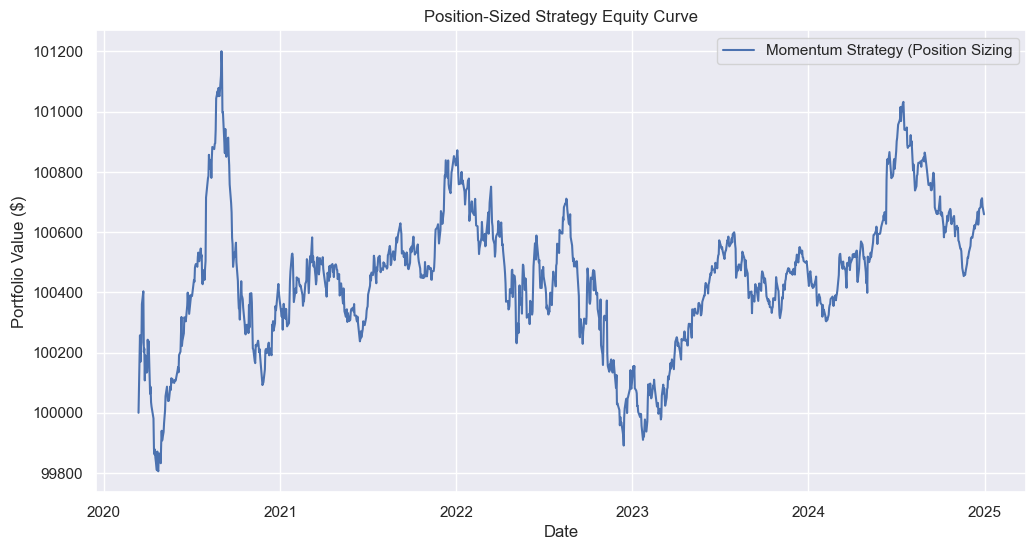

In [20]:
plt.figure(figsize = (12, 6))
plt.plot(df['equity_curve'], label = 'Momentum Strategy (Position Sizing')
plt.title("Position-Sized Strategy Equity Curve")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()